## Biel González Garriga NIU:1551813

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, HTML
import mpl_toolkits.mplot3d.axes3d as a3d
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from pandas_profiling import ProfileReport
from myLibrary.myFunctions import *

In [2]:
#importing libraries
import pandas as pd 
import numpy as np 
import seaborn as sns 
import time
import matplotlib.pyplot as plt
import matplotlib.patches as patches

import sklearn.metrics as metrics

from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.compose import make_column_transformer
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression, Perceptron, LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve, train_test_split, LeaveOneOut, RepeatedStratifiedKFold
from sklearn.inspection import permutation_importance
from sklearn.multiclass import OneVsRestClassifier
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import RFECV

from sklearn.model_selection import KFold #for K-fold cross validation
from sklearn.model_selection import cross_val_score #score evaluation
from sklearn.model_selection import cross_val_predict #prediction

from itertools import cycle

import warnings
warnings.filterwarnings('ignore')

In [3]:
display(HTML("<style>.container {width:99% !important; }</style>"))

In [4]:
df = pd.read_csv('lol_ranked_games.csv', header=0, delimiter=',')

In [5]:
df.head(30)

,gameId,gameDuration,hasWon,frame,goldDiff,expDiff,champLevelDiff,isFirstTower,isFirstBlood,killedFireDrake,...,destroyedBotOuterTurret,lostTopOuterTurret,lostMidOuterTurret,lostBotOuterTurret,kills,deaths,assists,wardsPlaced,wardsDestroyed,wardsLost
0,4546233126,1443000,1,10,-448,-147,-0.2,0,1,0,...,0,0,0,0,4,7,5,21,3,5
1,4546233126,1443000,1,12,-1306,-925,-0.6,0,1,0,...,0,0,0,0,6,11,6,28,4,6
2,4546233126,1443000,1,14,2115,2578,0.4,1,1,0,...,0,0,0,0,10,11,12,35,4,6
3,4546233126,1443000,1,16,1195,2134,0.4,1,1,0,...,0,0,1,0,10,12,12,45,6,10
4,4546233126,1443000,1,18,2931,4382,0.6,1,1,1,...,0,0,1,0,13,13,16,49,7,12
5,4546233126,1443000,1,20,6127,7606,0.8,1,1,1,...,1,0,1,0,20,14,28,63,9,13
6,4546233126,1443000,1,22,7428,7842,1.4,1,1,1,...,1,0,1,0,23,15,33,75,10,13
7,4546233126,1443000,1,24,9426,11980,1.8,1,1,2,...,1,0,1,0,26,15,36,85,11,14
8,4438212663,1241000,1,10,898,934,0.0,0,1,0,...,0,0,0,0,6,6,7,15,4,1
9,4438212663,1241000,1,12,1263,1566,0.4,0,1,0,...,0,0,0,0,7,7,7,20,5,4


In [6]:
df.shape

(242572, 59)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242572 entries, 0 to 242571
Data columns (total 59 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   gameId                   242572 non-null  int64  
 1   gameDuration             242572 non-null  int64  
 2   hasWon                   242572 non-null  int64  
 3   frame                    242572 non-null  int64  
 4   goldDiff                 242572 non-null  int64  
 5   expDiff                  242572 non-null  int64  
 6   champLevelDiff           242572 non-null  float64
 7   isFirstTower             242572 non-null  int64  
 8   isFirstBlood             242572 non-null  int64  
 9   killedFireDrake          242572 non-null  int64  
 10  killedWaterDrake         242572 non-null  int64  
 11  killedAirDrake           242572 non-null  int64  
 12  killedEarthDrake         242572 non-null  int64  
 13  killedElderDrake         242572 non-null  int64  
 14  lost

In [8]:
df.describe()

,gameId,gameDuration,hasWon,frame,goldDiff,expDiff,champLevelDiff,isFirstTower,isFirstBlood,killedFireDrake,...,destroyedBotOuterTurret,lostTopOuterTurret,lostMidOuterTurret,lostBotOuterTurret,kills,deaths,assists,wardsPlaced,wardsDestroyed,wardsLost
count,2.425720e+05,2.425720e+05,242572.000000,242572.000000,242572.000000,242572.000000,242572.000000,242572.000000,242572.000000,242572.000000,...,242572.000000,242572.000000,242572.000000,242572.000000,242572.000000,242572.000000,242572.000000,242572.000000,242572.000000,242572.000000
mean,4.501480e+09,1.785494e+06,0.498128,19.811264,-11.413811,-215.019351,-0.026517,0.617709,0.998627,0.295908,...,0.369997,0.376795,0.368822,0.355243,16.391381,16.342220,21.166029,56.833530,10.487031,10.263077
std,5.331693e+07,3.761901e+05,0.499998,7.197339,5438.051920,5261.880802,0.772366,0.485948,0.037026,0.509759,...,0.482805,0.484584,0.482487,0.478588,9.660237,9.697602,16.055645,58.734777,8.713549,8.736323
min,4.357970e+09,5.490000e+05,0.000000,10.000000,-21578.000000,-32484.000000,-4.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000
25%,4.463051e+09,1.532000e+06,0.000000,14.000000,-3420.250000,-3148.000000,-0.600000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,9.000000,9.000000,9.000000,25.000000,4.000000,4.000000
50%,4.529395e+09,1.774000e+06,0.000000,18.000000,24.000000,-123.000000,0.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,15.000000,15.000000,17.000000,40.000000,8.000000,8.000000
75%,4.543718e+09,2.025000e+06,1.000000,24.000000,3409.000000,2772.000000,0.400000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,22.000000,22.000000,30.000000,63.000000,15.000000,14.000000
max,4.547671e+09,3.428000e+06,1.000000,56.000000,23432.000000,43304.000000,3.800000,1.000000,1.000000,4.000000,...,1.000000,1.000000,1.000000,1.000000,69.000000,72.000000,137.000000,1014.000000,115.000000,107.000000


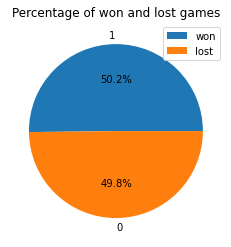

In [9]:
plt.pie([len(df[df["hasWon"]==0]),len(df[df["hasWon"]==1])],
        labels=df["hasWon"].unique(),autopct='%1.1f%%')
plt.title("Percentage of won and lost games")
plt.legend(labels=["won","lost"])
#50-50 dades balancejades, no fa falta fer res (oversampling, undersampling)

In [10]:
#load expanded df
df = pd.read_csv('ExpandedLolData.csv', header=0, delimiter=',')
print("================================\n",
      "\tDataframe loaded\n",
      "================================\n")

 	Dataframe loaded



In [ ]:
profile = ProfileReport(df, title="Pandas Profiling Report")

In [ ]:
profile

In [11]:
finishedGame_df = pd.read_csv('FinishedGames.csv', header=0, delimiter=',')
print("================================\n",
      "\tDataframe loaded\n",
      "================================\n")

 	Dataframe loaded



In [12]:
finishedGame_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24912 entries, 0 to 24911
Data columns (total 92 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   gameId                        24912 non-null  int64  
 1   gameDuration                  24912 non-null  int64  
 2   hasWon                        24912 non-null  int64  
 3   frame                         24912 non-null  int64  
 4   goldDiff                      24912 non-null  int64  
 5   expDiff                       24912 non-null  int64  
 6   champLevelDiff                24912 non-null  float64
 7   isFirstTower                  24912 non-null  int64  
 8   isFirstBlood                  24912 non-null  int64  
 9   killedFireDrake               24912 non-null  int64  
 10  killedWaterDrake              24912 non-null  int64  
 11  killedAirDrake                24912 non-null  int64  
 12  killedEarthDrake              24912 non-null  int64  
 13  k

In [ ]:
profile = ProfileReport(finishedGame_df, title="Pandas Profiling Report")

In [ ]:
profile

In [ ]:
plt.figure(figsize=(7,7))
plt.pie([len(finishedGame_df[finishedGame_df["obtainedDrakeSoul"]==False]),len(finishedGame_df[finishedGame_df["obtainedDrakeSoul"]==True])],
        labels=finishedGame_df["obtainedDrakeSoul"].unique(),autopct='%1.1f%%')
plt.title("Percentage of dragon souls by game")
plt.legend()

In [ ]:
interestCols=['GameFireDrakeSoul','GameAirDrakeSoul','GameEarthDrakeSoul','GameWaterDrakeSoul']
countDict={}
for i in interestCols:
    countDict[i]=finishedGame_df[i].sum()
print(countDict.values())
plt.figure(figsize=(10,10))
plt.pie(countDict.values(),autopct='%1.1f%%')
plt.title("Percentage of each dragon soul by game")
plt.legend(labels=countDict.keys())

In [ ]:
impactDict={'FireDrakeImpact':[0,0],'AirDrakeImpact':[0,0],'WaterDrakeImpact':[0,0],'EarthDrakeImpact':[0,0]}
ObtainedSouls=["obtainedFireDrakeSoul","obtainedAirDrakeSoul","obtainedWaterDrakeSoul","obtainedEarthDrakeSoul"]
LostSouls=["lostFireDrakeSoul","lostAirDrakeSoul","lostWaterDrakeSoul","lostEarthDrakeSoul"]
for i,j,k in zip(impactDict.keys(),ObtainedSouls,LostSouls):
    impactDict[i][0]+=((finishedGame_df['hasWon']==1)&(finishedGame_df[j]==1)).sum()+((finishedGame_df['hasWon']==0)&(finishedGame_df[k]==1)).sum() #Win+Get_Soul & Lose+Lost_Soul(Enemy team soul + they win)
    impactDict[i][1]+=((finishedGame_df['hasWon']==0)&(finishedGame_df[j]==1)).sum()+((finishedGame_df['hasWon']==1)&(finishedGame_df[k]==1)).sum() #Lose+Get_Soul & Win+Lost_Soul(Enemy team soul + they lose) 

fig, ax = plt.subplots(figsize=(10,10))
size = 0.3

vals=np.array(list(impactDict.values()))

cmap = plt.colormaps["tab20c"]
outer_colors = cmap(np.arange(4)*4)
inner_colors = cmap([2,3,6,7,9,10,13,14])

ax.pie(vals.sum(axis=1),radius=1, colors=outer_colors,
       wedgeprops=dict(width=size, edgecolor='w'),
      labels=impactDict.keys(),autopct='%1.1f%%',
      pctdistance=0.8)

ax.pie(vals.flatten(), radius=1-size, colors=inner_colors,
       wedgeprops=dict(width=size, edgecolor='w'),autopct='%1.1f%%',
      pctdistance=1-size)
ax.legend(impactDict.keys(),loc='upper left')
ax.set(aspect="equal", title='Impact of each dragon soul')
plt.show()

In [ ]:
#subplots
fig, axs = plt.subplots(2,2,figsize=(10,10))
ax=axs.flatten()
for i,j in zip(range(0,4),impactDict.keys()):
    ax[i].pie(impactDict[j],autopct='%1.1f%%')
    ax[i].set_title(j)
    ax[i].legend(['Positive','Negative'],loc='upper left')

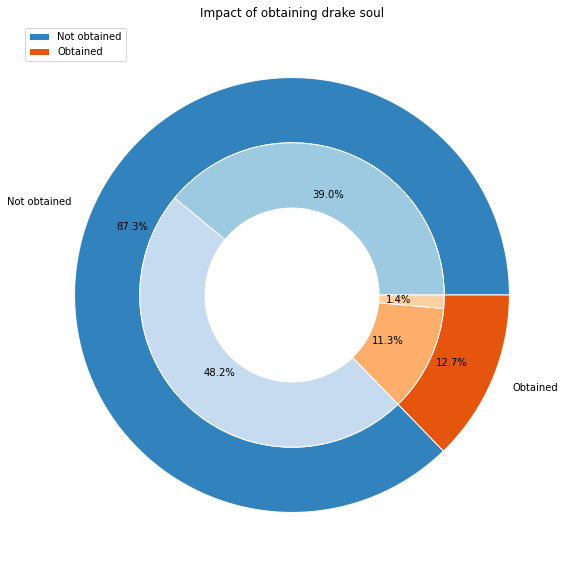

In [13]:
col1='hasWon'
col2='obtainedDrakeSoul'
title='Impact of obtaining drake soul'
labels=["Not obtained","Obtained"]#['No drake Soul','Drake soul']
doublePieWonLost(finishedGame_df,col1,col2,title,labels)

In [ ]:
col1='hasWon'
col2='lostDrakeSoul'
title='Impact of losing drake soul'
labels=["Not lost","Lost"]
doublePieWonLost(finishedGame_df,col1,col2,title,labels)

In [ ]:
col1='hasWon'
col2='killedBaronNashor'
title='Number of killed baron nashor and win proportion'
doublePieWonLost(finishedGame_df,col1,col2,title,labels,(20,20))

In [ ]:
col1='hasWon'
col2='lostBaronNashor'
title='Number of lost baron nashor and win proportion'
doublePieWonLost(finishedGame_df,col1,col2,title,labels,(20,20))

In [ ]:
#vision score
plt.figure(figsize = (20,20))
sns.histplot(data = finishedGame_df, x = 'visionScore',
             hue = "hasWon",binwidth=5,palette = sns.color_palette(['#6883ad','#285cb0'])
             ,multiple = "stack" ).set_title(f"{'visionScore'} Vs hasWon")
plt.legend(['Won','Lost'])
plt.show()
#passat cert punt de vision score win>loss

In [ ]:
#vision
plt.figure(figsize = (20,20))
sns.displot(data = finishedGame_df, x = 'visionScore',
             hue = "hasWon",palette = sns.color_palette(["red","green"])
             ,kind = "kde",bw_adjust=.25,fill=True )
plt.legend(['Won','Lost'])
plt.show()
#passat cert punt de vision score win>loss

In [ ]:
#gold diff
plt.figure(figsize = (20,20))
sns.displot(data = finishedGame_df, x = 'goldDiff',
             hue = "hasWon",palette = sns.color_palette(["red","green"])
             ,kind = "kde",bw_adjust=.25,fill=True )
plt.legend(['Won','Lost'])
plt.show()
#passat cert punt de vision score win>loss

In [ ]:
#gold and xp diff

plt.figure(figsize = (20,20))
sns.jointplot(data = finishedGame_df, x = 'goldDiff', y = "expDiff",
            hue="hasWon", kind="kde")
plt.show()

In [ ]:
#Clara correlació entre la diferencia d'or i la diferencia d'experiencia
finishedGame_df['goldDiff'].corr(finishedGame_df['expDiff'])

In [ ]:

plt.figure(figsize = (20,20))
sns.jointplot(data = finishedGame_df, x ='killedElemDrakes', y ="killedBaronNashor",
            hue="hasWon", kind="kde")
plt.show()

In [ ]:
#No hi ha tanta correlacio 
finishedGame_df['killedBaronNashor'].corr(finishedGame_df['killedElemDrakes'])

In [ ]:
#gold and xp diff

plt.figure(figsize = (20,20))
sns.jointplot(data = finishedGame_df, x ='lostBaronNashor', y ="killedBaronNashor",
            hue="hasWon", kind="kde")
plt.show()

In [ ]:
finishedGame_df['killedBaronNashor'].corr(finishedGame_df['lostBaronNashor'])

In [ ]:
#gold and xp diff

plt.figure(figsize = (20,20))
sns.jointplot(data = finishedGame_df, x ='totalLostStructures', y ="totalDestroyedStructures",
            hue="hasWon", kind="kde")
plt.show()

In [ ]:
finishedGame_df['totalLostStructures'].corr(finishedGame_df['totalDestroyedStructures'])

In [ ]:
#gold diff
plt.figure(figsize = (40,20))
sns.displot(data = finishedGame_df, x = 'killedBaronNashor',
             hue = "hasWon",palette = sns.color_palette(["red","green"])
             ,kind = "hist",fill=False,discrete=True)
plt.legend(['Won','Lost'])
plt.show()
#passat cert punt de vision score win>loss

In [ ]:
#gold and xp diff

plt.figure(figsize = (20,20))
sns.displot(data = finishedGame_df, x ='killedElemDrakes', y ="gameDuration",
            hue="hasWon", kind="kde")
plt.show()

In [ ]:
finishedGame_df['killedElemDrakes'].corr(finishedGame_df['gameDuration'])

In [ ]:
#Exploracio del primer drac
aux_df=df[(df['killedElemDrakes']==1) | (df["lostElemDrakes"])==1]

In [ ]:
aux_df[["gameId","frame","killedElemDrakes","lostElemDrakes"]].head(30)

In [ ]:
aux_df[aux_df.frame.eq(aux_df.groupby('gameId').frame.transform('min'))].describe()

In [ ]:
#gold diff
plt.figure(figsize = (40,20))
sns.displot(data = finishedGame_df, x = 'killedElemDrakes',
             hue = "hasWon",palette = sns.color_palette(["red","green"])
             ,kind = "hist",fill=False,discrete=True )
plt.legend(['Won','Lost'])
plt.show()
#passat cert punt de vision score win>loss

In [ ]:
#gold diff
plt.figure(figsize = (40,20))
sns.displot(data = finishedGame_df, x = 'totalDestroyedTurrets',
             hue = "hasWon",palette = sns.color_palette(["red","green"])
             ,kind = "hist",fill=False,discrete=True )
plt.legend(['Won','Lost'])
plt.show()

In [ ]:
#gold diff
plt.figure(figsize = (40,20))
sns.displot(data = finishedGame_df, x = 'totalLostTurrets',
             hue = "hasWon",palette = sns.color_palette(["red","green"])
             ,kind = "hist",fill=False,discrete=True )
plt.legend(['Won','Lost'])
plt.show()

In [ ]:
#gold diff
plt.figure(figsize = (40,20))
sns.displot(data = finishedGame_df, x = 'totalGameDestroyedStructures',
             hue = "hasWon",palette = sns.color_palette(["red","green"])
             ,kind = "kde",bw_adjust=.25,fill=True )
plt.legend(['Won','Lost'])
plt.show()

In [ ]:
#gold diff
plt.figure(figsize = (40,20))
sns.displot(data = finishedGame_df, x = 'kills',
             hue = "hasWon",palette = sns.color_palette(["red","green"])
             ,kind = "kde",bw_adjust=.25,fill=True )
plt.legend(['Won','Lost'])
plt.show()

In [ ]:
#gold diff
plt.figure(figsize = (40,20))
sns.displot(data = finishedGame_df, x = 'deaths',
             hue = "hasWon",palette = sns.color_palette(["red","green"])
             ,kind = "kde",bw_adjust=.25,fill=True )
plt.legend(['Won','Lost'])
plt.show()

In [ ]:
#gold diff
plt.figure(figsize = (40,20))
sns.displot(data = finishedGame_df, x = 'assists',
             hue = "hasWon",palette = sns.color_palette(["red","green"])
             ,kind = "kde",bw_adjust=.25,fill=True )
plt.legend(['Won','Lost'])
plt.show()

In [ ]:
#gold diff
plt.figure(figsize = (40,20))
sns.displot(data = finishedGame_df, x = 'KDA',
             hue = "hasWon",palette = sns.color_palette(["red","green"])
             ,kind = "kde",bw_adjust=.25,fill=True )
plt.legend(['Won','Lost'])
plt.show()
#passat cert punt de vision score win>loss

In [ ]:
#gold diff
plt.figure(figsize = (40,20))
sns.displot(data = finishedGame_df, x = 'gameDuration',
             hue = "hasWon",palette = sns.color_palette(["red","green"])
             ,kind = "kde",bw_adjust=.25,fill=True )
plt.legend(['Won','Lost'])
plt.show()
#passat cert punt de vision score win>loss

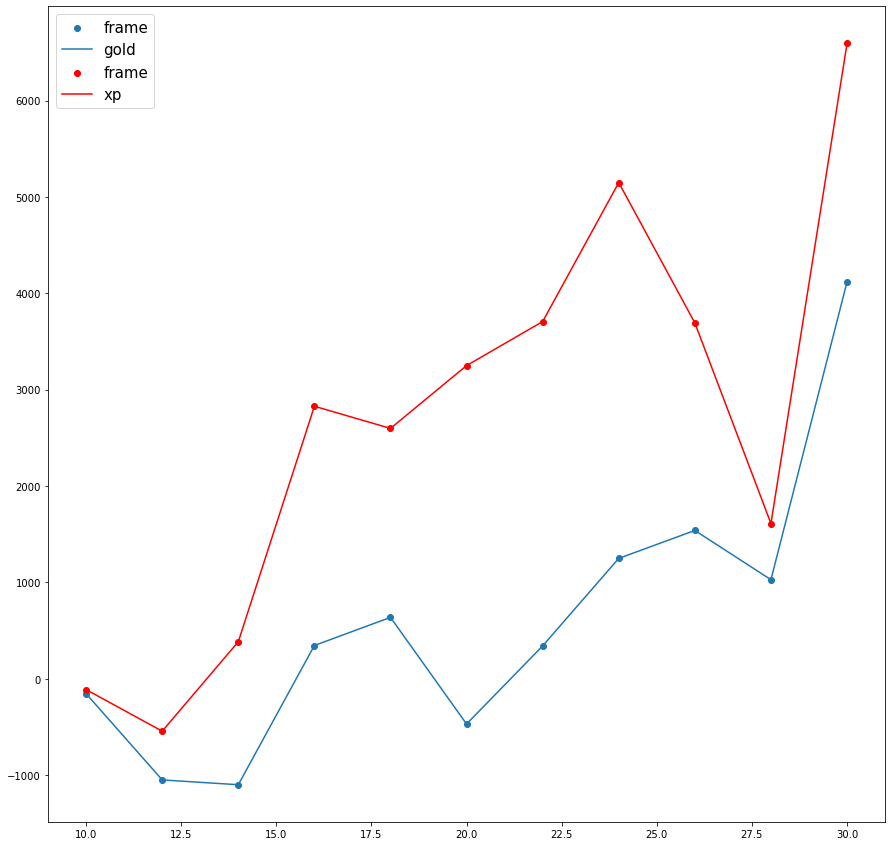

In [14]:
expAndGoldProgress(df,finishedGame_df['gameId'][2])

In [ ]:
#Clara correlació entre la diferencia d'oir i la diferencia d'experiencia
df['goldDiff'].corr(df['expDiff'])

In [ ]:
corKDA=(df['KDA'].corr(df['expDiff']),df['KDA'].corr(df['goldDiff']))
print("Correlació KDA-expDiff: ",corKDA[0],"\nCorrelació KDA-goldDiff: ",corKDA[1])

In [ ]:
#All game time
corrAT=df.corr()
plt.figure(figsize=(100,100))
ax=sns.heatmap(corrAT,annot=True,linewidth=2,vmin=-1.0,vmax=1.0)

In [ ]:
#End game time
corrFG=finishedGame_df.corr()
plt.figure(figsize=(100,100))
ax=sns.heatmap(corrFG,annot=True,linewidth=2,vmin=-1.0,vmax=1.0)

In [ ]:
#End game time
plt.figure(figsize=(10,100))
corrFGhW=np.array(corrFG["hasWon"]).reshape(len(corrFG["hasWon"]),1)
ax=sns.heatmap(corrFGhW,annot=True,linewidth=2,vmin=-1.0,vmax=1.0)

In [ ]:
#Fer dues classificacions, en qualsevol moment de la partida(dificil)
#Al final de la partida(facil)

# Models

In [15]:
Train_df,Test_df=train_test_split(finishedGame_df,test_size=0.2,random_state=3)
train,test=train_test_split(Train_df,test_size=0.2,random_state=3)
X_train=train.drop(["gameId","frame","hasWon"],axis=1)
Y_train=train.pop("hasWon")
X_test=test.drop(["gameId","frame","hasWon"],axis=1)
Y_test=test.pop("hasWon")

In [18]:
min_features_to_select = 1  # Minimum number of features to consider
rfecv = RFECV(
    estimator=RandomForestClassifier(),
    step=1,
    cv=StratifiedKFold(2),
    scoring="accuracy",
    min_features_to_select=min_features_to_select,
)
rfecv.fit(X_train, Y_train)

print("Optimal number of features : %d" % rfecv.n_features_)

Optimal number of features : 18


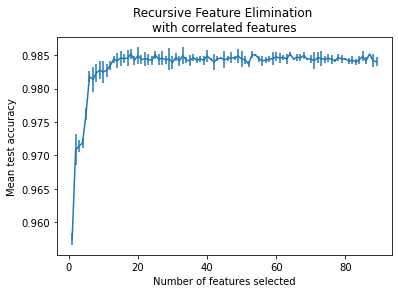

In [26]:
n_scores = len(rfecv.cv_results_["mean_test_score"])
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Mean test accuracy")
plt.errorbar(
    range(min_features_to_select, n_scores + min_features_to_select),
    rfecv.cv_results_["mean_test_score"],
    yerr=rfecv.cv_results_["std_test_score"],
)
plt.title("Recursive Feature Elimination \nwith correlated features")
plt.show()

Veiem que el RFECV no fa canvis gairebé a l'accuracy amb el nombre de features, per tant no es necessari eliminar-ne cap

In [ ]:
features = X_train.columns
train_y = Y_train
test_y = Y_test

Roc, F1 = [], []
features = features.tolist()

for idx, feature in enumerate(features):
    classf=AdaBoostClassifier().fit(np.array(X_train[feature]).reshape(-1,1), Y_train)
    preds = classf.predict(np.array(X_test[feature]).reshape(-1,1))
    y_pred_proba = classf.predict_proba(np.array(X_test[feature]).reshape(-1,1))
    
    roc=metrics.roc_auc_score(Y_test, y_pred_proba[:,1])
    f1 = metrics.f1_score(Y_test, preds, average='weighted')
    Roc.append(roc)
    F1.append(f1)

    print(f"{feature} - ROC: {roc:.3f}; F1: {f1:.3f};")

roc = np.array(Roc)
f1 = np.array(F1)
plt.figure(figsize=(20,7)) 
plt.scatter(range(1,len(features)+1), roc, label='roc')
plt.scatter(range(1,len(features)+1), f1, label='f1')
plt.legend()
plt.show()

In [30]:
Roc, F1 = [], []
for i in range(1, 10):
    pca = PCA(n_components=i)
    x_train = pca.fit_transform(X_train)
    x_test = pca.transform(X_test)

    classf=LogisticRegression().fit(x_train, Y_train)
    preds = classf.predict(x_test)
    y_pred_proba = classf.predict_proba(x_test)
    
    roc=metrics.roc_auc_score(Y_test, y_pred_proba[:,1])
    f1 = metrics.f1_score(Y_test, preds, average='weighted')
    Roc.append(roc)
    F1.append(f1)
    print(f"PCA_{i} - ROC: {roc:.3f}; F1: {f1:.3f}")

PCA_1 - ROC: 0.525; F1: 0.518
PCA_2 - ROC: 0.994; F1: 0.969
PCA_3 - ROC: 0.995; F1: 0.971
PCA_4 - ROC: 0.995; F1: 0.971
PCA_5 - ROC: 0.995; F1: 0.971
PCA_6 - ROC: 0.995; F1: 0.971
PCA_7 - ROC: 0.995; F1: 0.971
PCA_8 - ROC: 0.995; F1: 0.971
PCA_9 - ROC: 0.995; F1: 0.971


In [39]:
pca=PCA()
scaler=StandardScaler()
logistic=LogisticRegression()
pipe=Pipeline(steps=[("scaler",scaler),("pca", pca), ("logistic", logistic)])
param_grid = {
    "pca__n_components": [5, 15, 30, 45, 60],
    "logistic__C": np.logspace(-4, 4, 4),
}
search = GridSearchCV(pipe, param_grid, n_jobs=2)
search.fit(X_train,Y_train)
print("Best parameter (CV score=%0.3f):" % search.best_score_)
print(search.best_params_)

Best parameter (CV score=0.987):
{'logistic__C': 10000.0, 'pca__n_components': 60}


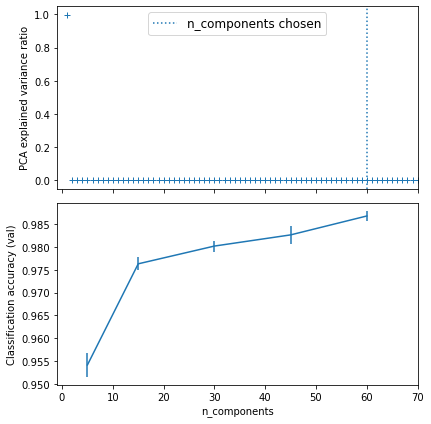

In [40]:
# Plot the PCA spectrum
pca.fit(X_train)

fig, (ax0, ax1) = plt.subplots(nrows=2, sharex=True, figsize=(6, 6))
ax0.plot(
    np.arange(1, pca.n_components_ + 1), pca.explained_variance_ratio_, "+", linewidth=2
)
ax0.set_ylabel("PCA explained variance ratio")

ax0.axvline(
    search.best_estimator_.named_steps["pca"].n_components,
    linestyle=":",
    label="n_components chosen",
)
ax0.legend(prop=dict(size=12))

# For each number of components, find the best classifier results
results = pd.DataFrame(search.cv_results_)
components_col = "param_pca__n_components"
best_clfs = results.groupby(components_col).apply(
    lambda g: g.nlargest(1, "mean_test_score")
)

best_clfs.plot(
    x=components_col, y="mean_test_score", yerr="std_test_score", legend=False, ax=ax1
)
ax1.set_ylabel("Classification accuracy (val)")
ax1.set_xlabel("n_components")

plt.xlim(-1, 70)

plt.tight_layout()
plt.show()

Podem veure que a partir de `n_components`=2 tenim una millora molt gran de l'accuracy y de la variancia explicada

In [ ]:
from sklearn.inspection import permutation_importance

Logistic Regression
ROC score is:  0.9948179758308157
f1 score is: 0.970647289446178


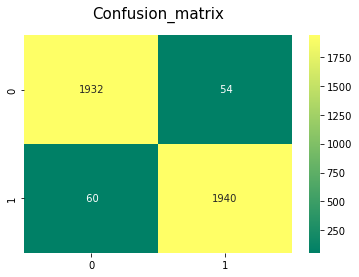

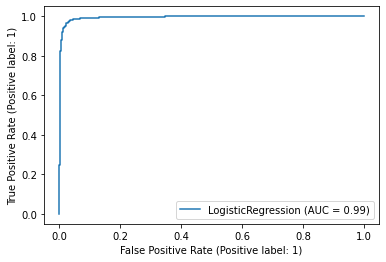

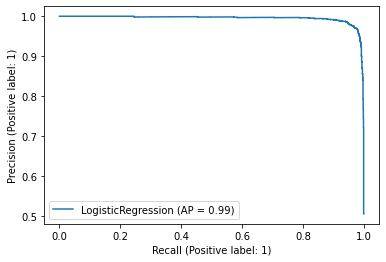

In [43]:
print("Logistic Regression")
model = LogisticRegression()
model.fit(X_train,Y_train)
prediction_rm=model.predict(X_test)

y_pred = cross_val_predict(model,X_test,Y_test,cv=10)
sns.heatmap(metrics.confusion_matrix(Y_test,y_pred),annot=True,fmt='3.0f',cmap="summer")
plt.title('Confusion_matrix', y=1.05, size=15)

y_pred_proba = model.predict_proba(X_test)
print("ROC score is: ", metrics.roc_auc_score(Y_test, y_pred_proba[:,1]))
metrics.RocCurveDisplay.from_estimator(model,X_test,Y_test)
metrics.PrecisionRecallDisplay.from_estimator(model,X_test,Y_test)
f1 = metrics.f1_score(Y_test, model.predict(X_test), average='weighted')
print("f1 score is:", f1)

In [44]:
result=permutation_importance(model, X_train,Y_train,n_repeats=5,random_state=2,n_jobs=2)

In [45]:
forest_importances=pd.Series(result.importances_mean,
                             index=Train_df.columns.drop(["hasWon","gameId","frame"]))

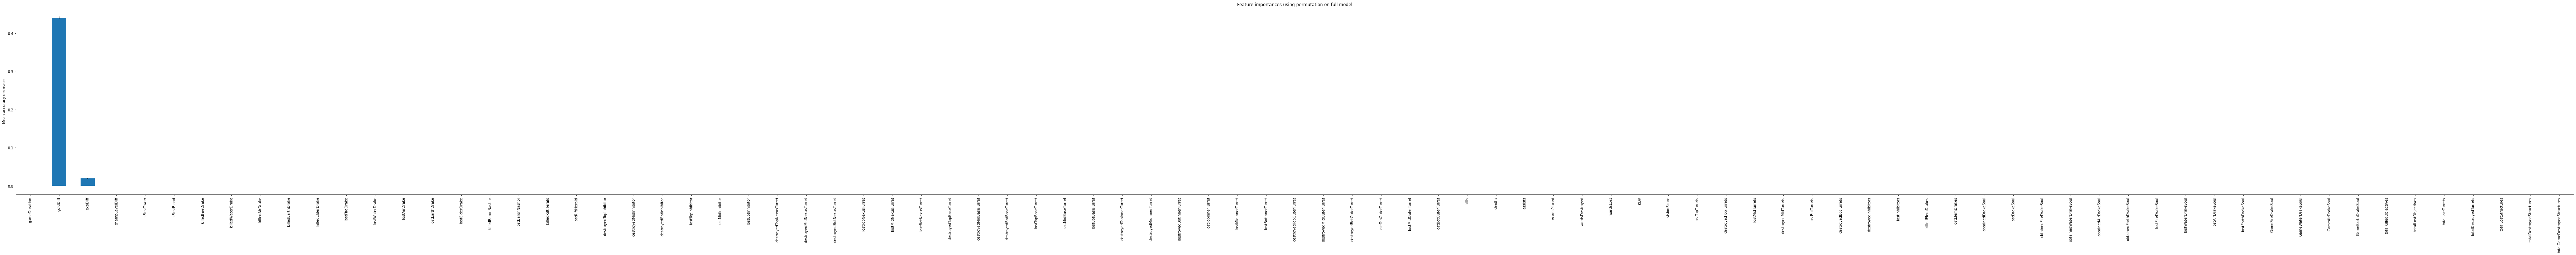

In [46]:
fig, ax = plt.subplots(figsize=(100,10))
forest_importances.plot.bar(yerr=result.importances_std, ax=ax)
ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()

In [ ]:
from skopt import BayesSearchCV
print("Logistic Regression")

log_param_grid = {'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
                   'C':(0.01, 100.0, 'log-uniform')
                 }

model = LogisticRegression()
model.fit(X_train,Y_train)
prediction_rm=model.predict(X_test)

print('Accuracy without Grid and crossvalidation: ',round(metrics.accuracy_score(prediction_rm,Y_test)*100,2))

LogReg = LogisticRegression()
LogReg = BayesSearchCV(LogReg,
                       log_param_grid,
                       cv = StratifiedKFold(n_splits = 10),
                       scoring = "accuracy",
                       n_iter= 10,
                       )

LogReg.fit(X_train,Y_train)
prediction_rm=LogReg.predict(X_test)
print(pd.concat([pd.DataFrame(LogReg.cv_results_["params"]),pd.DataFrame(LogReg.cv_results_["mean_test_score"], columns=["Accuracy"])],axis=1))
result_rm=LogReg.best_score_
print('The cross validated score for Logistic Regression is:',round(result_rm.mean()*100,2))

model=LogReg.best_estimator_
y_pred = cross_val_predict(model,X_test,Y_test,cv=10)
sns.heatmap(metrics.confusion_matrix(Y_test,y_pred),annot=True,fmt='3.0f',cmap="summer")
plt.title('Confusion_matrix', y=1.05, size=15)

y_pred_proba = model.predict_proba(X_test)
print("ROC score is: ", metrics.roc_auc_score(Y_test, y_pred_proba[:,1]))
metrics.RocCurveDisplay.from_estimator(model,X_test,Y_test)
metrics.PrecisionRecallDisplay.from_estimator(model,X_test,Y_test)
f1 = metrics.f1_score(Y_test, LogReg.predict(X_test), average='weighted')
print("f1 score is:", f1)

#plot_features(model.coef_[0],Train_df.columns.drop("hasWon"))

In [ ]:
bestLogReg=model

In [ ]:
result=permutation_importance(bestLogReg, X_train,Y_train,n_repeats=5,random_state=2,n_jobs=2)

In [ ]:
forest_importances=pd.Series(result.importances_mean,index=Train_df.columns.drop(["hasWon","gameId","frame"]))

In [ ]:
fig, ax = plt.subplots(figsize=(100,10))
forest_importances.plot.bar(yerr=result.importances_std, ax=ax)
ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()

In [ ]:
min_features_to_select = 1  # Minimum number of features to consider
rfecv = RFECV(
    estimator=bestLogReg,
    step=1,
    cv=StratifiedKFold(2),
    scoring="accuracy",
    min_features_to_select=min_features_to_select,
)
rfecv.fit(X_train, Y_train)

print("Optimal number of features : %d" % rfecv.n_features_)

In [ ]:
# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (accuracy)")
plt.plot(
    range(min_features_to_select, len(rfecv.grid_scores_) + min_features_to_select),
    rfecv.grid_scores_,
)
plt.show()

In [ ]:
print("Best scores:\nSplit 0: ",rfecv.grid_scores_[rfecv.n_features_-1][0], " --- Split 1: ",rfecv.grid_scores_[rfecv.n_features_-1][1])

In [ ]:
print(rfecv.get_feature_names_out())

In [ ]:
from skopt import BayesSearchCV
print("AdaBoostClassifier")

#El fem amb una regressió logistica per millorar els resultats

Ada_param_grid = {'n_estimators':(1, 100, 'uniform'),
                  'learning_rate':(0.5,3.,'log-uniform')}

model = AdaBoostClassifier()
model.fit(X_train,Y_train)
prediction_rm=model.predict(X_test)

print('Accuracy without Grid and crossvalidation: ',round(metrics.accuracy_score(prediction_rm,Y_test)*100,2))

ABC = AdaBoostClassifier()
ABC = BayesSearchCV(ABC,
                       Ada_param_grid,
                       cv = StratifiedKFold(n_splits = 2),
                       scoring = "accuracy",
                       n_iter= 10)
ABC.fit(X_train,Y_train)
prediction_rm=ABC.predict(X_test)
print(pd.concat([pd.DataFrame(ABC.cv_results_["params"]),pd.DataFrame(ABC.cv_results_["mean_test_score"], columns=["Accuracy"])],axis=1))
result_rm=ABC.best_score_
print('The best hyperparameters are: ',
      '\nn_estimators=',ABC.best_params_['n_estimators'],
      '\nlearning_rate',ABC.best_params_['learning_rate'])
print('The cross validated score for AdaBoostClassifier is:',round(result_rm.mean()*100,2))

model=ABC.best_estimator_
y_pred = cross_val_predict(model,X_test,Y_test,cv=10)
sns.heatmap(metrics.confusion_matrix(Y_test,y_pred),annot=True,fmt='3.0f',cmap="summer")
plt.title('Confusion_matrix', y=1.05, size=15)

y_pred_proba = model.predict_proba(X_test)
print("ROC score is: ", metrics.roc_auc_score(Y_test, y_pred_proba[:,1]))
metrics.RocCurveDisplay.from_estimator(model,X_test,Y_test)
metrics.PrecisionRecallDisplay.from_estimator(model,X_test,Y_test)
f1 = metrics.f1_score(Y_test, ABC.predict(X_test), average='weighted')
print("f1 score is:", f1)


In [ ]:
bestADB=model

In [ ]:
result=permutation_importance(bestADB, X_train,Y_train,n_repeats=5,random_state=2,n_jobs=2)

In [ ]:
forest_importances=pd.Series(result.importances_mean,index=Train_df.columns.drop(["hasWon","gameId","frame"]))

In [ ]:
fig, ax = plt.subplots(figsize=(100,10))
forest_importances.plot.bar(yerr=result.importances_std, ax=ax)
ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()

In [ ]:
min_features_to_select = 1  # Minimum number of features to consider
rfecv = RFECV(
    estimator=bestADB,
    step=1,
    cv=StratifiedKFold(2),
    scoring="accuracy",
    min_features_to_select=min_features_to_select,
)
rfecv.fit(X_train, Y_train)<

print("Optimal number of features : %d" % rfecv.n_features_)

In [ ]:
# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (accuracy)")
plt.plot(
    range(min_features_to_select, len(rfecv.grid_scores_) + min_features_to_select),
    rfecv.grid_scores_,
)
plt.show()

In [ ]:
print(rfecv.get_feature_names_out())